<a href="https://colab.research.google.com/github/Chandrashekar0123/Lerno-DL-case-study/blob/DeepLearning-Models/Alexnet_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
import matplotlib.pyplot as plt
from keras.layers import BatchNormalization
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
'''from google.colab import drive
drive.mount('/content/drive')'''

"from google.colab import drive\ndrive.mount('/content/drive')"

In [ ]:
# /content/drive/MyDrive/Face Recognition using CNN/Original Images
train_dir="/content/drive/MyDrive/DATASET/"
generator = ImageDataGenerator()
train_ds = generator.flow_from_directory(train_dir, target_size=(224, 224), batch_size=32)

Found 205 images belonging to 1 classes.


In [ ]:

classes = list(train_ds.class_indices.keys())


In [ ]:

model = Sequential()


In [ ]:
model.add(Conv2D(96, kernel_size=(11, 11), strides=(4,4), activation='relu',input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2,2)))
model.add(BatchNormalization())
#1

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:

model.add(Conv2D(256, kernel_size=(5,5), activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3), strides = (2,2)))
model.add(BatchNormalization())
#2

In [ ]:

model.add(Conv2D(384, kernel_size=(3,3), activation='relu', padding = 'same'))



In [ ]:
model.add(Conv2D(384, kernel_size=(3,3), activation='relu',padding = 'same'))



In [ ]:

model.add(Conv2D(256, kernel_size=(3,3), activation='relu',padding = 'same'))



In [ ]:
model.add(MaxPooling2D(pool_size=(3,3),strides = (2,2) ))

In [ ]:

model.add(Dropout(0.5))
model.add(Flatten())


In [ ]:

model.add(Dense(128, activation='relu'))
model.add(Dense(len(classes),activation='softmax'))


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 54, 54, 96)          │          34,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 26, 26, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 26, 26, 96)          │             384 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 22, 22, 256)         │         614,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 10, 10, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 10, 10, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 10, 10, 384)         │         885,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 10, 10, 384)         │       1,327,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 10, 10, 256)         │         884,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         524,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,818,053 (48.90 MB)

 Trainable params: 4,272,449 (16.30 MB)

 Non-trainable params: 704 (2.75 KB)

 Optimizer params: 8,544,900 (32.60 MB)

In [ ]:

history = model.fit(train_ds,epochs= 10, batch_size=32)


Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 23s 3s/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 21s 3s/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 21s 3s/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 41s 3s/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 22s 3s/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 41s 3s/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 39s 3s/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 22s 3s/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 9/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 10/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 23s 3s/step - accuracy: 1.0000 - loss: 0.0000e+00


In [ ]:
from tensorflow.keras.utils import load_img, img_to_array


In [ ]:

def predict_image(image_path):
 img = load_img(image_path, target_size=(224,224,3))
 plt.imshow(img)
 plt.show()
 x = img_to_array(img)
 x = np.expand_dims(x, axis=0)
 images = np.vstack([x])
 pred = model.predict(images, batch_size=32)
 print("Actual: "+(image_path.split("/")[-1]).split("_")[0])
 print("Predicted: "+classes[np.argmax(pred)])


In [ ]:
import os
print(os.listdir("/content/drive/MyDrive/DATASET/Faces"))


['Faces']


In [ ]:
print(os.listdir("/content/drive/MyDrive/DATASET/Faces/Faces"))


['Akshay Kumar_10.jpg', 'Akshay Kumar_12.jpg', 'Akshay Kumar_0.jpg', 'Akshay Kumar_11.jpg', 'Akshay Kumar_1.jpg', 'Alexandra Daddario_7.jpg', 'Alexandra Daddario_76.jpg', 'Alexandra Daddario_66.jpg', 'Alexandra Daddario_74.jpg', 'Alexandra Daddario_19.jpg', 'Alexandra Daddario_16.jpg', 'Alia Bhatt_20.jpg', 'Alexandra Daddario_55.jpg', 'Alexandra Daddario_77.jpg', 'Alexandra Daddario_59.jpg', 'Alexandra Daddario_87.jpg', 'Alexandra Daddario_10.jpg', 'Alexandra Daddario_39.jpg', 'Alexandra Daddario_71.jpg', 'Alexandra Daddario_4.jpg', 'Alexandra Daddario_22.jpg', 'Akshay Kumar_20.jpg', 'Alia Bhatt_19.jpg', 'Alexandra Daddario_82.jpg', 'Alexandra Daddario_50.jpg', 'Alexandra Daddario_90.jpg', 'Akshay Kumar_35.jpg', 'Alia Bhatt_12.jpg', 'Alexandra Daddario_86.jpg', 'Akshay Kumar_47.jpg', 'Alexandra Daddario_27.jpg', 'Akshay Kumar_30.jpg', 'Alexandra Daddario_53.jpg', 'Alia Bhatt_16.jpg', 'Alexandra Daddario_83.jpg', 'Alexandra Daddario_32.jpg', 'Alexandra Daddario_3.jpg', 'Akshay Kumar_3.j

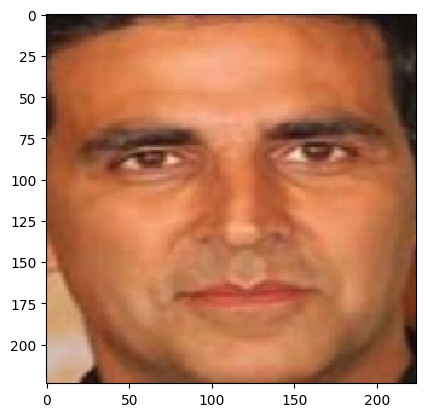

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
Actual: Akshay Kumar
Predicted: Faces


In [ ]:
predict_image("/content/drive/MyDrive/DATASET/Faces/Faces/Akshay Kumar_1.jpg")


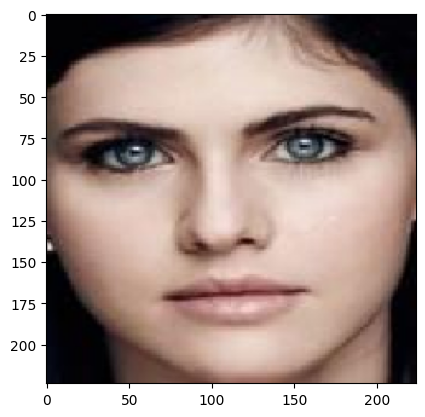

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Actual: Alexandra Daddario
Predicted: Faces


In [ ]:
predict_image("/content/drive/MyDrive/DATASET/Faces/Faces/Alexandra Daddario_1.jpg")

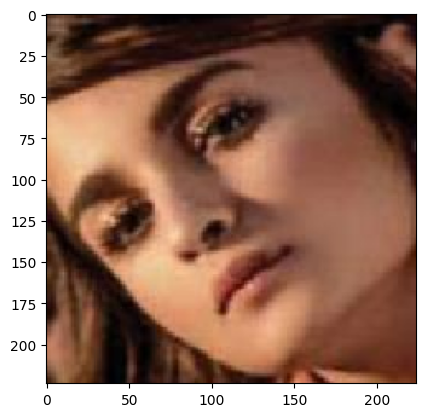

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Actual: Alia Bhatt
Predicted: Faces


In [ ]:
predict_image("/content/drive/MyDrive/DATASET/Faces/Faces/Alia Bhatt_14.jpg")

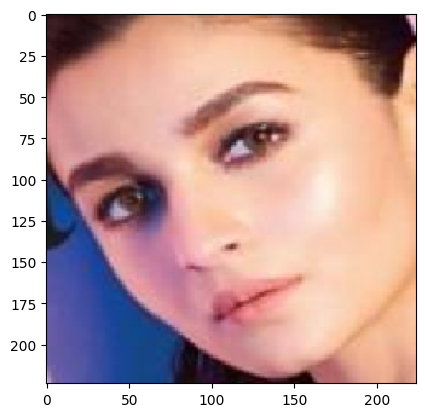

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Actual: Alia Bhatt
Predicted: Faces


In [ ]:
predict_image("/content/drive/MyDrive/DATASET/Faces/Faces/Alia Bhatt_1.jpg")